##Imports and Loading

In [76]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, f1_score, make_scorer, mean_absolute_error, r2_score

from google.colab import drive
drive.mount('/content/drive')
drive_dir = '/content/drive/Shared drives/Project 4 (MATH 3439)/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import joblib 
xg_model = joblib.load(drive_dir + 'models/XGB_model.joblib')

[21:31:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
knn_model0 = joblib.load(drive_dir + f'models/knn_model0.joblib')
knn_model1 = joblib.load(drive_dir + f'models/knn_model1.joblib')
knn_model2 = joblib.load(drive_dir + f'models/knn_model2.joblib')
knn_model3 = joblib.load(drive_dir + f'models/knn_model3.joblib')
knn_model4 = joblib.load(drive_dir + f'models/knn_model4.joblib')
knn_model5 = joblib.load(drive_dir + f'models/knn_model5.joblib')
knn_model6 = joblib.load(drive_dir + f'models/knn_model6.joblib')
knn_model7 = joblib.load(drive_dir + f'models/knn_model7.joblib')
knn_model8 = joblib.load(drive_dir + f'models/knn_model8.joblib')
knn_model9 = joblib.load(drive_dir + f'models/knn_model9.joblib')
knn_model10 = joblib.load(drive_dir + f'models/knn_model10.joblib')
knn_model11 = joblib.load(drive_dir + f'models/knn_model11.joblib')

In [ ]:
df = pd.read_csv(drive_dir + 'data/df_model2.csv')

In [74]:
train_X = pd.read_csv(drive_dir + 'data/train_X.csv')
test_X = pd.read_csv(drive_dir + 'data/test_X.csv')
train_y = pd.read_csv(drive_dir + 'data/train_y.csv')
test_y = pd.read_csv(drive_dir + 'data/test_y.csv')

In [75]:
train_X.shape

(336036, 10)

In [ ]:
test_y.shape

(112012, 1)

In [77]:
prediction_df = pd.read_csv(drive_dir + 'data/knn_pred_df.csv')

In [78]:
xg_pred = np.load(drive_dir + 'xg_preds.npy')

In [ ]:
test_X.shape

(112012, 10)

#Best Ensemble Model

In [79]:
def mean_abs_pct_error(test_y, y_pred):

  return np.mean(np.abs((test_y - y_pred) / test_y)) * 100

In [80]:
ensemble_df = pd.DataFrame() 

In [81]:
ensemble_df['knn_pred'] = prediction_df['mean_pred']

In [82]:
ensemble_df['xgb_pred'] = xg_pred

In [83]:
ensemble_df['actual'] = prediction_df['actual']

In [84]:
ensemble_df.head()

,knn_pred,xgb_pred,actual
0,27392.416667,29991.671875,29500.0
1,20092.333333,20153.166016,19254.0
2,16714.966667,17093.615234,15922.0
3,23768.383333,18669.166016,22988.0
4,13233.783333,11639.646484,15400.0


In [85]:
best_error = np.infty
best_weight = 0
for weight in np.linspace(0,1,1000):
  ensemble_df['ensemble_pred'] = weight*ensemble_df['knn_pred'] + (1-weight)*ensemble_df['xgb_pred']
  error = mean_abs_pct_error(ensemble_df['actual'],ensemble_df['ensemble_pred'])

  if error < best_error:
    best_error = error
    best_weight = weight

In [92]:
best_weight

0.5475475475475475

In [93]:
best_error

11.832315704523582

In [90]:
weight = 0.5475475475475475
ensemble_df['ensemble_pred'] = weight*ensemble_df['knn_pred'] + (1-weight)*ensemble_df['xgb_pred']
error = mean_abs_pct_error(ensemble_df['actual'],ensemble_df['ensemble_pred'])

In [91]:
mean_absolute_error(ensemble_df['actual'],ensemble_df['ensemble_pred'])

2015.6145156448674

##Predictions

In [ ]:
xg_pred = xg_pred
knn_pred = prediction_df['mean_pred'].to_numpy()

In [ ]:
predictions = np.zeros(test_X.shape[0], dtype=np.float32)
for pred in range(test_X.shape[0]):
  knn = knn_pred[pred]
  xg = xg_pred[pred]

  predictions[pred] = ((knn+xg)/2)

In [ ]:
mean_absolute_error(test_y, predictions)

2264.207867010127

#Graphs

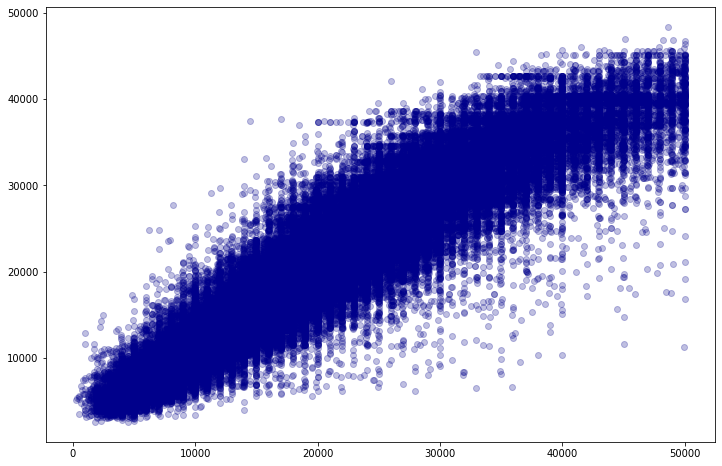

In [ ]:
plt.figure(figsize = (12,8))
plt.scatter(x=test_y,y=xg_pred, c='DarkBlue', alpha = .25);

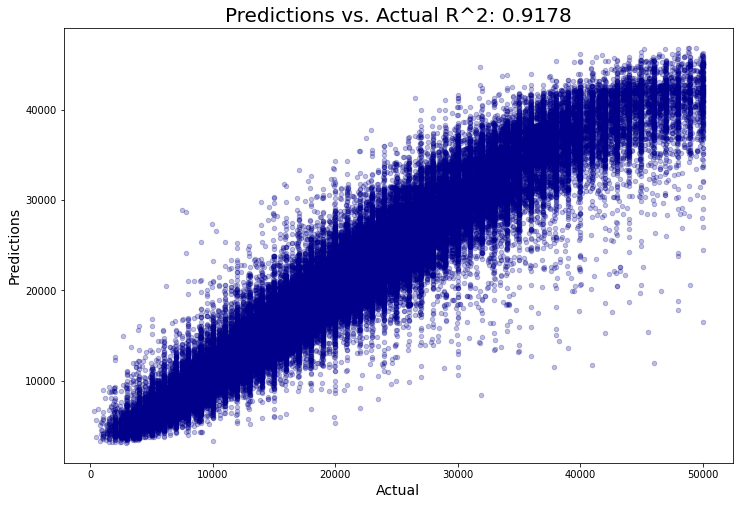

In [94]:
corr = round(r2_score(ensemble_df['actual'], ensemble_df['ensemble_pred']),4)
ensemble_df.plot.scatter(x='actual',y='ensemble_pred', c='DarkBlue', alpha = .25, figsize = (12,8), title = f"Predictions vs. Actual R^2: {corr}")
plt.title(f"Predictions vs. Actual R^2: {corr}", fontsize=20)
plt.ylabel('Predictions', fontsize=14)
plt.xlabel('Actual', fontsize=14)
plt.savefig(drive_dir + 'scatter.png');


# Looking at odd data points

In [ ]:
check = df[df['price'] == 49999.0]

In [ ]:
check[check['horsepower'] == 302.0]

,back_legroom,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_new,latitude,length,listed_date,listing_color,longitude,major_options,make_name,maximum_seating,mileage,model_name,owner_count,price,salvage,savings_amount,seller_rating,sp_name,theft_title,transmission,transmission_display,trim_name,wheel_system,wheelbase,width,year,null_per_row,rounded_price,options_count,color_not_bw,interior_simple_color,years_since_make,damage_accidents_theft,4WD,percentile
235450,40.3,Sedan,Williston,14.0,53,5000,V8,0,0,0,41.3,23.0,Gasoline,0,56.9,21,302,Black,0,0,44.4762,203.1,2020-07-18,BLACK,-73.1190,['Navigation System'],Mercedes-Benz,5,7497.0,S-Class,2,49999.0,0,0.0,5.000000,MD Motors LLC,0,A,5-Speed Automatic,S 500,RWD,121.5,73.1,2001,1,50000.0,1.0,1,Black,19,0,0,10
564500,36.7,SUV / Crossover,Lake Bluff,23.0,100,2000,I4,0,0,1,40.3,16.1,Gasoline,0,60.1,30,302,Black w Dakota Leather Upholstery,0,0,42.2732,172.2,2020-06-02,WHITE,-87.8662,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",BMW,5,2500.0,X2,0,49999.0,0,2975.0,4.208333,Knauz BMW,0,A,8-Speed Automatic,M35i AWD,AWD,105.1,82.6,2020,1,50000.0,9.0,1,Black,0,0,0,10


In [ ]:
ensemble_df['difference'] = ensemble_df['ensemble_pred']-ensemble_df['actual']
ensemble_df['difference'] = abs(ensemble_df['difference'])

In [ ]:
ensemble_df.sort_values(by='difference', ascending=False).head()

,knn_pred,xgb_pred,actual,ensemble_pred,difference
101171,11736.366667,12332.288086,49999.0,11792.439353,38206.560647
4248,8712.516667,6563.524414,46000.0,8510.309187,37489.690813
7992,9319.100000,13872.037109,45499.0,9747.504493,35751.495507
97510,13486.716667,23223.669922,47995.0,14402.906462,33592.093538
40219,16990.050000,14528.687500,48000.0,16758.450325,31241.549675


In [ ]:
test_X.iloc[101171]

horsepower            302.0
wheel_system            4.0
year                 2001.0
owner_count             2.0
height                 56.9
engine_type            25.0
city_fuel_economy      14.0
width                  73.1
make_name              31.0
Name: 101171, dtype: float64

In [ ]:
test_X.iloc[4248]

horsepower            240.0
wheel_system            4.0
year                 2005.0
owner_count             2.0
height                 66.1
engine_type            17.0
city_fuel_economy       8.0
width                  77.2
make_name              10.0
Name: 4248, dtype: float64

In [ ]:
test_X.iloc[7992]

horsepower            253.0
wheel_system            4.0
year                 2001.0
owner_count             2.0
height                 50.9
engine_type            20.0
city_fuel_economy      15.0
width                  76.5
make_name              36.0
Name: 7992, dtype: float64

In [ ]:
test_X.iloc[97510]

horsepower            240.0
wheel_system            2.0
year                 2016.0
owner_count             2.0
height                 56.8
engine_type            20.0
city_fuel_economy      21.0
width                  81.5
make_name              31.0
Name: 97510, dtype: float64

#Inputs

In [ ]:
columns = ['horsepower', 'wheel_system', 'year', 'owner_count', 'height', 'engine_type', 'city_fuel_economy', 'width', 'make_name']

In [ ]:
df_test = df[columns]

In [ ]:
def inputs(df):
  columns = ['horsepower', 'wheel_system', 'year', 'owner_count', 'height', 'engine_type', 'city_fuel_economy', 'width', 'make_name']

  while True:
    year = int(input('What year is the car? '))
    if year not in range(1950,2021):
      print(f'Not a valid year. Try Again!')
    else:
      break
  horsepower = input('How much horsepower does your car have? ')
  owner_count = input('How many people have owned the car? ')
  height = input('What is the height of the car? ')
  width = input('What is the width of the car? ')
  city_fuel = input('What is the city fuel economy? ')
  while True:
    wheel_system = input('What is the wheel system? (FWD, AWD, 4WD, RWD, 4X2) ')
    if wheel_system not in ['FWD', 'AWD', '4WD', 'RWD', '4X2']:
      print(f'Not a valid wheel system. Check capitilization and spelling. Try Again!')
    else:
      break
  make = input('What is the make of the car? ')
  engine_type = input('What is the engine type? ')

  #df = df.drop('price', axis='columns')

  my_dict = {'year': [int(year)], 
             'horsepower': [int(horsepower)],
             'height': [int(height)], 
             'owner_count': [int(owner_count)], 
             'wheel_system': [str(wheel_system)],
             'engine_type': [str(engine_type)], 
             'city_fuel_economy': [int(city_fuel)],
             'width': [int(width)],
             'make_name': [str(make)]}

  car = pd.DataFrame.from_dict(my_dict, orient='columns')

  df = pd.concat([df, car])

  for c in df.columns:
    if c != 'price':  #default is fine; not sure if this line is necessary
      if df[c].dtype == object:  
          try:  
              le = LabelEncoder()           
              le.fit(df[c].unique())    
              df[c] = le.transform(df[c])  
          except Exception as e:         
              print(c)         
              print(e)

  car = df[-1:]

  return car

In [ ]:
def get_knn(car):

  price_0 = knn_model0.predict(car)
  price_1 = knn_model1.predict(car)
  price_2 = knn_model2.predict(car)
  price_3 = knn_model3.predict(car)
  price_4 = knn_model4.predict(car)
  price_5 = knn_model5.predict(car)
  price_6 = knn_model6.predict(car)
  price_7 = knn_model7.predict(car)
  price_8 = knn_model8.predict(car)
  price_9 = knn_model9.predict(car)
  price_10 = knn_model10.predict(car)
  price_11 = knn_model11.predict(car)

  price_prediction = (price_0 + price_1 + price_2 + price_3 + price_4 + price_5 + price_6 + price_7 + price_8 + price_9 + price_10 + price_11)/12 

  #print(f'Your car is worth ${price_prediction[0]}.')

  return price_prediction[0]

In [ ]:
def get_xg(car):

  price_prediction = xg_model.predict(car)

  #print(f'Your car is worth ${price_prediction[0]}.')

  return price_prediction[0]

In [ ]:
def user_input(df):

  weight = 0.5475475475475475

  users_car = inputs(df)

  knn_predict = get_knn(users_car)

  xg_predict = get_xg(users_car)

  price = weight*knn_predict + (1-weight)*xg_predict

  price_interval_lower = int(price - (2015/2))
  price_interval_higher = int(price + (2015/2))

  print(f'Your car is worth (${round(price_interval_lower,-2)}, ${round(price_interval_higher,-2)}).')

In [ ]:
user_input(df_test)

What year is the car? 2020
How much horsepower does your car have? 158
How many people have owned the car? 1
What is the height of the car? 57
What is the width of the car? 71
What is the city fuel economy? 30
What is the wheel system? (FWD, AWD, 4WD, RWD, 4X2) FWD
What is the make of the car? Honda
What is the engine type? I4
Your car is worth (18450, 20585)
